# *Optymalizacja wielokryterialna 2024/25*
##### Ćwiczenie 3: Najważniejsze metody skalaryzacji
##### Autorzy: Andrzej Janik, Artur Mazurkiewicz
##### Automatyka i Robotyka: Informatyka w Sterowaniu i Zarządzaniu

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Wstęp

Celem tego zadania było zapoznanie się z trzema podstawowymi metodami skalaryzacji, które służą do wyznaczania zbioru punktów oraz ocen niezdominowanych w kontekście problemów optymalizacji wielokryterialnej. 

Analizowane metody skalaryzacji to:
- Skalaryzacja przy użyciu funkcji liniowej.
- Skalaryzacja metodą 𝜖–ograniczeń.
- Skalaryzacja poprzez obliczanie odległości do wybranego punktu dominującego.

# Część pierwsza
Część pierwsza ćwiczenia polegała na analizie problemu dwukryterialnego z nieliniowymi, wybranymi przez nas funkcjami celu:
$$ F_1(x, y) = x^2 - y^2 $$
$$ F_2(x, y) = x^2 + y^2 $$

Zdefiniowany został zbiór rozwiązań dopuszczalnych, bedący elipsą o środku w punktach (5,5) i promieniach równych (1,1).

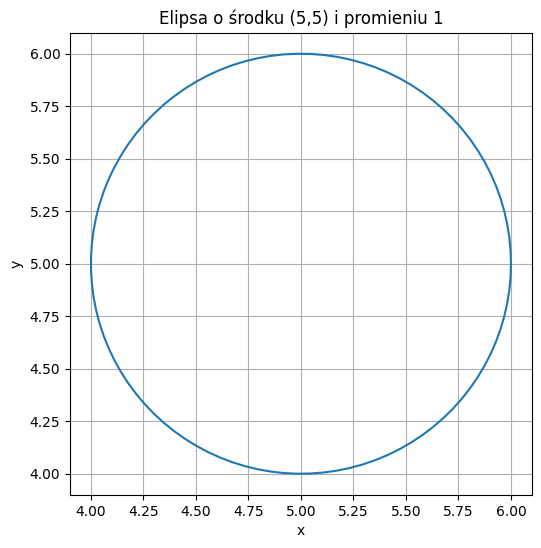

In [11]:
# Parametry elipsy
center_x, center_y = 5,5  # Środek elipsy
radius_x, radius_y = 1, 1  # Promienie na osiach x i y (w tym przypadku elipsa o promieniu 1)

# Generowanie punktów dla elipsy
t = np.linspace(0, 2 * np.pi, 100)
x_vals = center_x + radius_x * np.cos(t)
y_vals = center_y + radius_y * np.sin(t)

# Rysowanie elipsy
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Elipsa o środku (5,5) i promieniu 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


Zdefiniowane przez nas nieliniowe funkcje przekształcają powyższy zbiór rozwiązań do wypukłego zbioru przedstawionego poniżej.

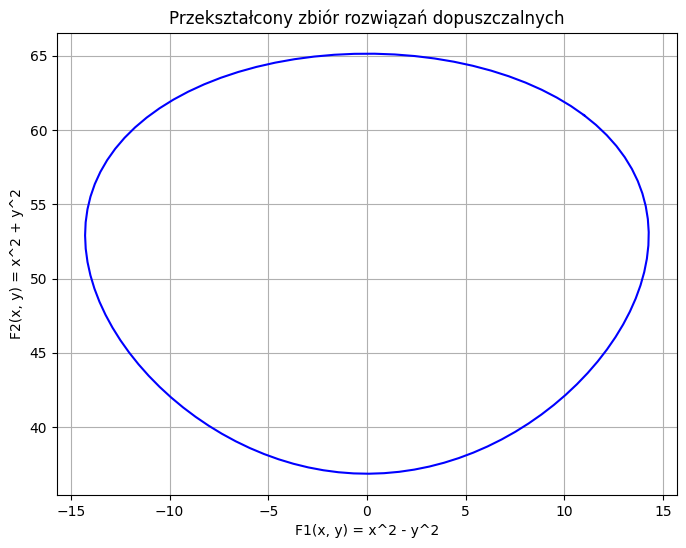

In [12]:
# Parametry elipsy
center_x, center_y = 5,5  # Środek elipsy
radius_x, radius_y = 1, 1  # Promienie na osiach x i y (w tym przypadku elipsa o promieniu 1)

# Generowanie punktów dla elipsy
t = np.linspace(0, 2 * np.pi, 100)
x_vals = center_x + radius_x * np.cos(t)
y_vals = center_y + radius_y * np.sin(t)

# Definicja funkcji celu
def objectives(x, y):
    f1 = x ** 2 - y ** 2
    f2 = x ** 2 + y ** 2
    return f1,  f2

# Obliczanie wartości funkcji celu dla wszystkich punktów elipsy
f1_vals = []
f2_vals = []
for x, y in zip(x_vals, y_vals):
    f1, f2 = objectives(x, y)
    f1_vals.append(f1)
    f2_vals.append(f2)

# Rysowanie wykresu dla uzyskanych wartości F1 i F2
plt.figure(figsize=(8, 6))
plt.plot(f1_vals, f2_vals, color='blue')
plt.title("Przekształcony zbiór rozwiązań dopuszczalnych")
plt.xlabel("F1(x, y) = x^2 - y^2")
plt.ylabel("F2(x, y) = x^2 + y^2")
plt.grid(True)
plt.show()


## Skalaryzacja przez funkcję liniową
Metoda polega na zdefiniowaniu nowej funkcji będącej liniową kombinacją funkcji $F_1$ oraz $F_2$
gdzie współczynniki kombinacji przy każdej z funkcji są wagami (suma wszystkich wag ma dawać 1).
Następnie wyznaczany jest zbiór punktów Pareto dla nowo powstałej funkcji.

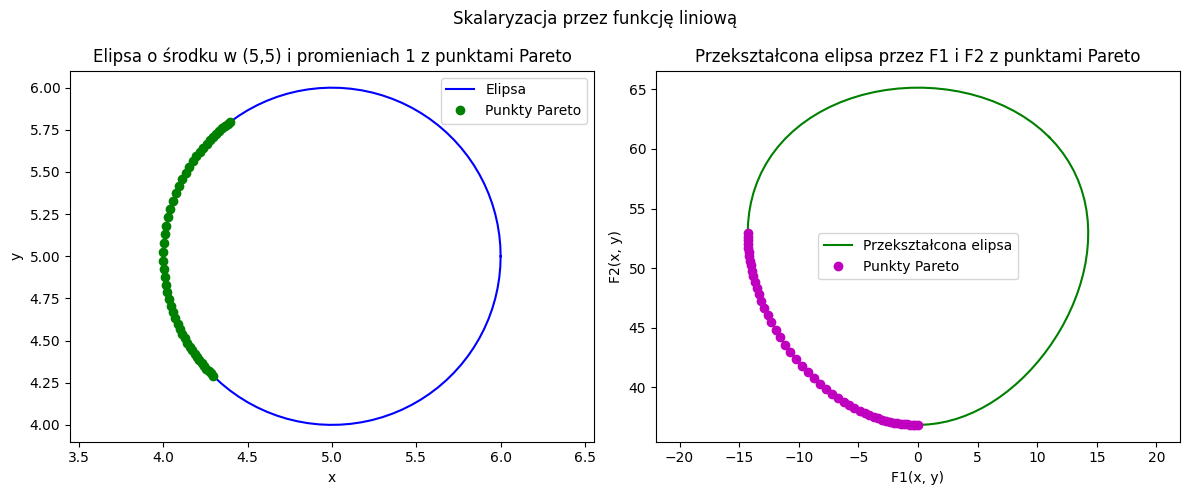

In [13]:
# Definicja wag
w1 = 0.5
w2 = 0.5


# Definicja funkcji F1 i F2
def F1(x, y):
    return x ** 2 - y ** 2

def F2(x, y):
    return x ** 2 + y ** 2

# Funkcja celu jako liniowa kombinacja F1 i F2
def objective(x, w1, w2):
    return w1 * F1(x[0], x[1]) + w2 * F2(x[0], x[1])

# Ograniczenia
# Warunki dolne i górne
bounds = [(4, 6), (4, 6)]  # Granice dolne i górne dla x i y

# Nieliniowe ograniczenie (wewnątrz okręgu)
def constraint_circle(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2)

# Definicja ograniczenia
constraints = {'type': 'ineq', 'fun': constraint_circle}

# Punkt początkowy bliski obszaru dopuszczalnego
x0 = [5, 5]

# Generowanie zbioru Pareto
pareto_points = []
weights = np.linspace(0, 1, 50)  # Wagi od 0 do 1 dla Pareto

for w1 in weights:
    w2 = 1 - w1  # suma wag musi wynosić 1
    result = minimize(objective, x0, args=(w1, w2), method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt = result.x
        pareto_points.append([F1(x_opt, y_opt), F2(x_opt, y_opt), x_opt, y_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elips
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = 5 + np.cos(theta)  # współrzędne x okręgu
circle_y = 5 + np.sin(theta)  # współrzędne y okręgu

# Przekształcona elipsa przez funkcje F1 i F2
ellipse_x = 5 + np.cos(theta)
ellipse_y = 5 + np.sin(theta)
transformed_x = F1(ellipse_x, ellipse_y)  # Zastosowanie F1 na elipsie
transformed_y = F2(ellipse_x, ellipse_y)  # Zastosowanie F2 na elipsie

# Wykresy
plt.figure(figsize=(12, 5))

# Wykres okręgu i zbioru Pareto
plt.subplot(1, 2, 1)
plt.plot(circle_x, circle_y, label="Elipsa", color='b')
plt.plot(pareto_points[:, 2], pareto_points[:, 3], 'go', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
plt.title("Elipsa o środku w (5,5) i promieniach 1 z punktami Pareto")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')

# Wykres przekształconej elipsy i zbioru Pareto
plt.subplot(1, 2, 2)
plt.plot(transformed_x, transformed_y, label="Przekształcona elipsa", color='g')
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'mo', label="Punkty Pareto")  # Punkty Pareto na przekształconej elipsie
plt.title("Przekształcona elipsa przez F1 i F2 z punktami Pareto")
plt.xlabel("F1(x, y)")
plt.ylabel("F2(x, y)")
plt.legend()
plt.axis('equal')

plt.suptitle("Skalaryzacja przez funkcję liniową")
plt.tight_layout()
plt.show()


## Skalaryzacja metodą $\epsilon$ ograniczeń.
Metoda ta polega na dobraniu jednej z nieliniowych funkcji celu, dla której później będzie
wyznaczany punkt optymalny. Jednocześnie dla reszty funkcji dobierane jest dodatkowe ograniczenie
postaci: $$𝐹_2 − \epsilon ≤ 0$$

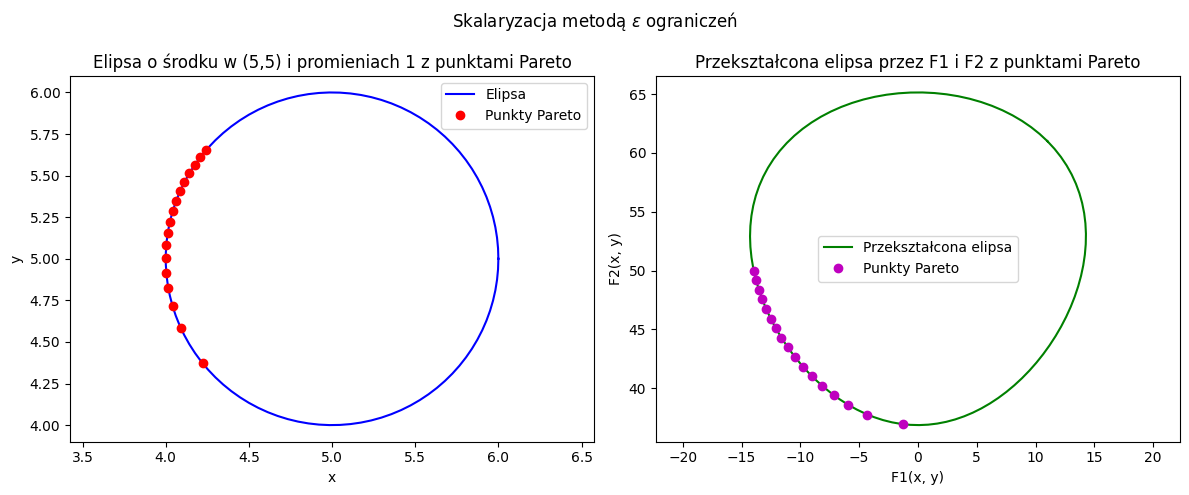

In [14]:
# Definicja funkcji F1 i F2
def F1(x, y):
    return x ** 2 - y ** 2

def F2(x, y):
    return x**2 + y**2

# Funkcja celu - minimalizujemy F1
def objective_F1(x):
    return F1(x[0], x[1])

# Ograniczenia
# Warunki dolne i górne
bounds = [(4, 6), (4, 6)]  # Granice dolne i górne dla x i y

# Nieliniowe ograniczenie (wewnątrz okręgu)
def constraint_circle(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2)

# Punkt początkowy
x0 = [5, 5]

# Generowanie zbioru Pareto metodą epsilon-ograniczeń
pareto_points = []
epsilon_values = np.linspace(10, 50, 50)  # Różne wartości epsilon

for epsilon in epsilon_values:
    # Definiujemy ograniczenie dla F2 jako F2(x, y) <= epsilon
    constraint_epsilon = {'type': 'ineq', 'fun': lambda x: epsilon - F2(x[0], x[1])}
    # Ograniczenie dla okręgu
    constraint_circle_dict = {'type': 'ineq', 'fun': constraint_circle}
    # Lista wszystkich ograniczeń
    constraints = [constraint_circle_dict, constraint_epsilon]
    # Rozwiązanie problemu minimalizacji dla F1 z ograniczeniem epsilon na F2
    result = minimize(objective_F1, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt = result.x
        pareto_points.append([F1(x_opt, y_opt), F2(x_opt, y_opt), x_opt, y_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elips
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = 5 + np.cos(theta)  # współrzędne x okręgu
circle_y = 5 + np.sin(theta)  # współrzędne y okręgu

# Przekształcona elipsa przez funkcje F1 i F2
ellipse_x = 5 + np.cos(theta)
ellipse_y = 5 + np.sin(theta)
transformed_x = F1(ellipse_x, ellipse_y)  # Zastosowanie F1 na elipsie
transformed_y = F2(ellipse_x, ellipse_y)  # Zastosowanie F2 na elipsie

# Wykresy
plt.figure(figsize=(12, 5))

# Wykres okręgu i zbioru Pareto
plt.subplot(1, 2, 1)
plt.plot(circle_x, circle_y, label="Elipsa", color='b')
plt.plot(pareto_points[:, 2], pareto_points[:, 3], 'ro', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
plt.title("Elipsa o środku w (5,5) i promieniach 1 z punktami Pareto")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')

# Wykres przekształconej elipsy i zbioru Pareto
plt.subplot(1, 2, 2)
plt.plot(transformed_x, transformed_y, label="Przekształcona elipsa", color='g')
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'mo', label="Punkty Pareto")  # Punkty Pareto na przekształconej elipsie
plt.title("Przekształcona elipsa przez F1 i F2 z punktami Pareto")
plt.xlabel("F1(x, y)")
plt.ylabel("F2(x, y)")
plt.legend()
plt.axis('equal')

plt.suptitle(r"Skalaryzacja metodą $\epsilon$ ograniczeń")
plt.tight_layout()
plt.show()


## Skalaryzacja przez odległość od wybranego punktu dominującego (minimalizacja odległości)
Metoda ta polega na wyborze punktu dominującego (idealnego) będącego punktem powstałym
poprzez połączenie najbardziej optymalnych wartości każdego kryterium spośród wszystkich
punktów. Następnie nową funkcją celu jest funkcja odległości od wyznaczonego punktu idealnego. W
tym wypadku użyta została użyta metryka euklidesowa.

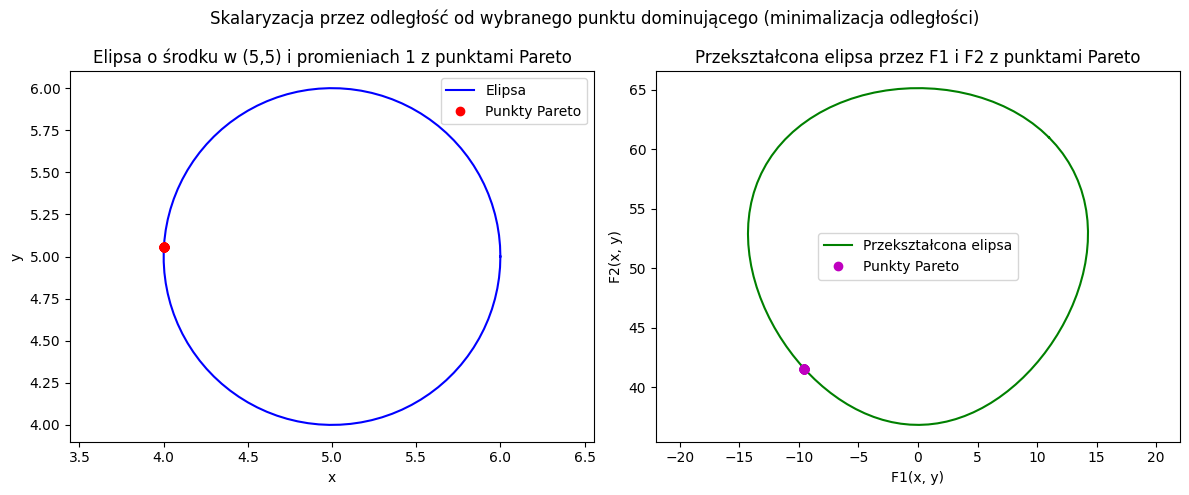

In [15]:
# Definicja funkcji F1 i F2
def F1(x, y):
    return x ** 2 - y ** 2

def F2(x, y):
    return x**2 + y**2

# Znajdowanie punktu idealnego dla F1 i F2
# Dla F1 i F2 osobno minimalizujemy wartości funkcji
bounds = [(4, 6), (4, 6)]  # Granice dolne i górne dla x i y

# Minimalizacja dla F1
result_F1 = minimize(lambda x: F1(x[0], x[1]), [5, 5], method='SLSQP', bounds=bounds)
ideal_F1 = F1(result_F1.x[0], result_F1.x[1]) if result_F1.success else None

# Minimalizacja dla F2
result_F2 = minimize(lambda x: F2(x[0], x[1]), [5, 5], method='SLSQP', bounds=bounds)
ideal_F2 = F2(result_F2.x[0], result_F2.x[1]) if result_F2.success else None

# Punkt idealny w przestrzeni funkcji celu
ideal_point = np.array([ideal_F1, ideal_F2])

# Definicja funkcji celu jako odległość euklidesowa od punktu idealnego
def objective_distance(x):
    F1_val = F1(x[0], x[1])
    F2_val = F2(x[0], x[1])
    return np.sqrt((F1_val - ideal_point[0])**2 + (F2_val - ideal_point[1])**2)

# Ograniczenie - okrąg o środku w (5,5) i promieniu 1
def constraint_circle(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2)

# Lista ograniczeń
constraints = [{'type': 'ineq', 'fun': constraint_circle}]

# Punkt początkowy
x0 = [5, 5]

# Minimalizacja funkcji odległości od punktu idealnego
pareto_points = []
for epsilon in np.linspace(0, 1, 50):  # Używamy różnych epsilonów dla bardziej szczegółowego zbioru Pareto
    result = minimize(objective_distance, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt = result.x
        pareto_points.append([F1(x_opt, y_opt), F2(x_opt, y_opt), x_opt, y_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elips
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = 5 + np.cos(theta)  # współrzędne x okręgu
circle_y = 5 + np.sin(theta)  # współrzędne y okręgu

# Przekształcona elipsa przez funkcje F1 i F2
ellipse_x = 5 + np.cos(theta)
ellipse_y = 5 + np.sin(theta)

transformed_x = F1(ellipse_x, ellipse_y)  # Zastosowanie F1 na elipsie
transformed_y = F2(ellipse_x, ellipse_y)  # Zastosowanie F2 na elipsie

# Wykresy
plt.figure(figsize=(12, 5))

# Wykres okręgu i zbioru Pareto
plt.subplot(1, 2, 1)
plt.plot(circle_x, circle_y, label="Elipsa", color='b')
plt.plot(pareto_points[:, 2], pareto_points[:, 3], 'ro', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
plt.title("Elipsa o środku w (5,5) i promieniach 1 z punktami Pareto")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')

# Wykres przekształconej elipsy i zbioru Pareto
plt.subplot(1, 2, 2)
plt.plot(transformed_x, transformed_y, label="Przekształcona elipsa", color='g')
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'mo', label="Punkty Pareto")  # Punkty Pareto na przekształconej elipsie
plt.title("Przekształcona elipsa przez F1 i F2 z punktami Pareto")
plt.xlabel("F1(x, y)")
plt.ylabel("F2(x, y)")
plt.legend()
plt.axis('equal')

plt.suptitle(r"Skalaryzacja przez odległość od wybranego punktu dominującego (minimalizacja odległości)")
plt.tight_layout()
plt.show()


# Część druga
Część druga ćwiczenia polegała na analizie problemu z trzema kryteriami, gdzie co najmniej jedno jest nieliniowe. Wybraliśmy następujące funkcję:
$$ G_1(x, y, z) = x + y + z $$
$$ G_2(x, y, z) = x - y + z $$
$$ G_3(x, y, z) = x^2 + y^2 + z^2 $$

## Skalaryzacja przez funkcję liniową

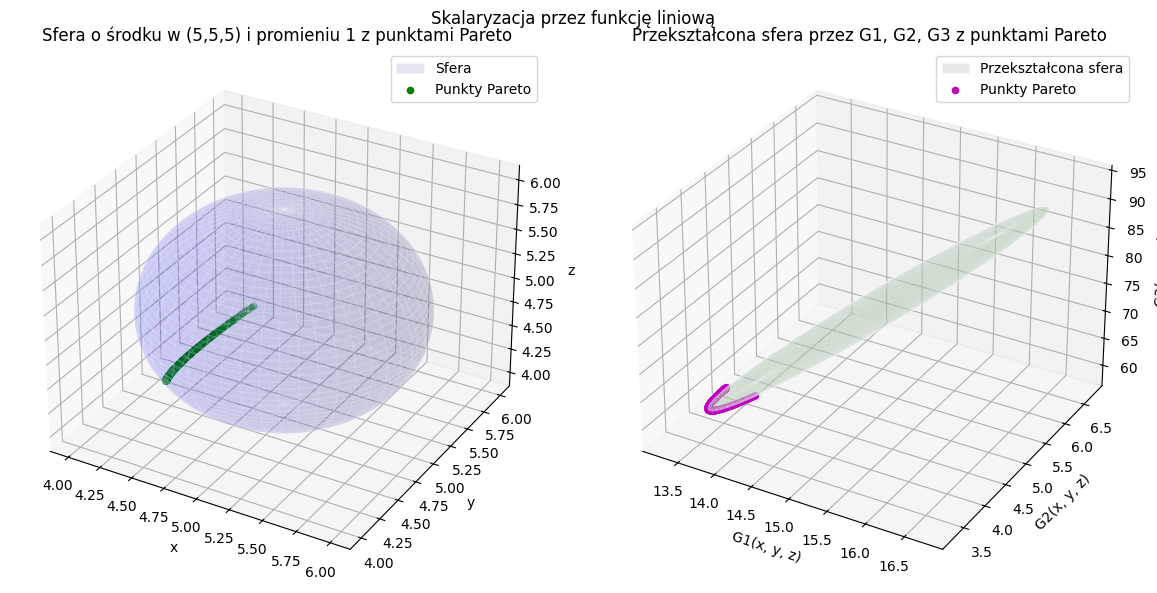

In [16]:
# Definicja wag
w1 = 0.33
w2 = 0.33
w3 = 0.34


# Definicja funkcji G1, G2 i G3
def G1(x, y, z):
    return x + y + z

def G2(x, y, z):
    return x - y + z

def G3(x, y, z):
    return x**2 + y**2 + z**2  # Nieliniowa funkcja celu

# Funkcja celu jako liniowa kombinacja G1, G2, G3
def objective(x, w1, w2, w3):
    return w1 * G1(x[0], x[1], x[2]) + w2 * G2(x[0], x[1], x[2]) + w3 * G3(x[0], x[1], x[2])

# Ograniczenia
# Warunki dolne i górne
bounds = [(4, 6), (4, 6), (4, 6)]  # Granice dolne i górne dla x, y, z

# Nieliniowe ograniczenie (wewnątrz okręgu)
def constraint_sphere(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2 + (x[2] - 5)**2)

# Definicja ograniczenia
constraints = {'type': 'ineq', 'fun': constraint_sphere}

# Punkt początkowy bliski obszaru dopuszczalnego
x0 = [5, 5, 5]

# Generowanie zbioru Pareto
pareto_points = []
weights = np.linspace(0, 1, 50)  # Wagi od 0 do 1 dla Pareto

for w1 in weights:
    for w2 in weights:
        w3 = 1 - w1 - w2  # suma wag musi wynosić 1
        if w3 >= 0:  # Jeśli w3 jest dodatnie, to mamy poprawną wagę
            result = minimize(objective, x0, args=(w1, w2, w3), method='SLSQP', bounds=bounds, constraints=constraints)
            if result.success:
                x_opt, y_opt, z_opt = result.x
                pareto_points.append([G1(x_opt, y_opt, z_opt), G2(x_opt, y_opt, z_opt), G3(x_opt, y_opt, z_opt), x_opt, y_opt, z_opt])

pareto_points = np.array(pareto_points)

# Rysowanie sfery
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
sphere_x = 5 + np.outer(np.cos(theta), np.sin(phi))  # współrzędne x sfery
sphere_y = 5 + np.outer(np.sin(theta), np.sin(phi))  # współrzędne y sfery
sphere_z = 5 + np.outer(np.ones_like(theta), np.cos(phi))  # współrzędne z sfery

# Przekształcone punkty przez funkcje G1, G2 i G3
transformed_x = G1(sphere_x, sphere_y, sphere_z)  # Zastosowanie G1 na sferze
transformed_y = G2(sphere_x, sphere_y, sphere_z)  # Zastosowanie G2 na sferze
transformed_z = G3(sphere_x, sphere_y, sphere_z)  # Zastosowanie G3 na sferze

# Wykresy
fig = plt.figure(figsize=(12, 6))

# Wykres sfery i zbioru Pareto
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(sphere_x, sphere_y, sphere_z, color='b', alpha=0.1, edgecolor='w', label="Sfera")
ax1.scatter(pareto_points[:, 3], pareto_points[:, 4], pareto_points[:, 5], c='g', label="Punkty Pareto")  # Punkty Pareto
ax1.set_title("Sfera o środku w (5,5,5) i promieniu 1 z punktami Pareto")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.legend()

# Wykres przekształconych punktów przez G1, G2 i G3
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(transformed_x, transformed_y, transformed_z, color='g', alpha=0.1, edgecolor='w', label="Przekształcona sfera")
ax2.scatter(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], c='m', label="Punkty Pareto")  # Punkty Pareto
ax2.set_title("Przekształcona sfera przez G1, G2, G3 z punktami Pareto")
ax2.set_xlabel("G1(x, y, z)")
ax2.set_ylabel("G2(x, y, z)")
ax2.set_zlabel("G3(x, y, z)")
ax2.legend()

plt.suptitle("Skalaryzacja przez funkcję liniową")
plt.tight_layout()
plt.show()


## Skalaryzacja metodą $\epsilon$ ograniczeń.

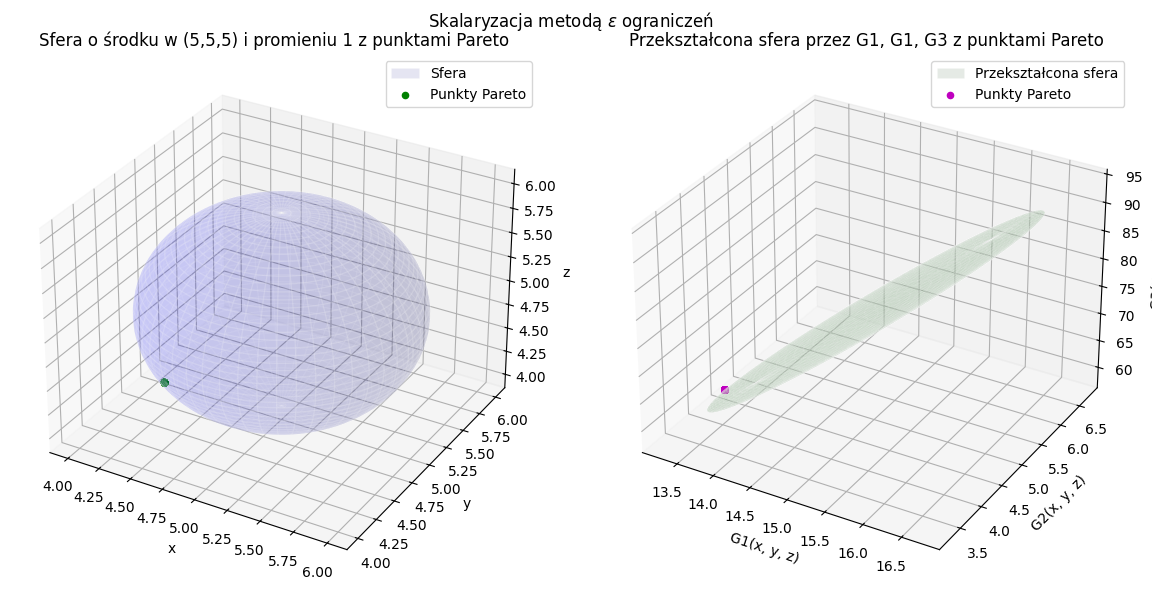

In [17]:
# Definicja funkcji G1, G2, G3
def G1(x, y, z):
    return x + y + z

def G2(x, y, z):
    return x - y + z

def G3(x, y, z):
    return x**2 + y**2 + z**2  # Nieliniowa funkcja celu

# Funkcja celu - minimalizujemy G1
def objective_G1(x):
    return G1(x[0], x[1], x[2])

# Ograniczenia
# Warunki dolne i górne
bounds = [(4, 6), (4, 6), (4, 6)]  # Granice dolne i górne dla x, y, z

# Nieliniowe ograniczenie (wewnątrz sfery)
def constraint_sphere(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2 + (x[2] - 5)**2)

# Punkt początkowy
x0 = [5, 5, 5]

# Generowanie zbioru Pareto metodą epsilon-ograniczeń
pareto_points = []
epsilon_values_G2 = np.linspace(10, 100, 50)  # Zwiększenie zakresu epsilon dla G2
epsilon_values_G3 = np.linspace(10, 100, 50)  # Zwiększenie zakresu epsilon dla G3

for epsilon_G2 in epsilon_values_G2:
    for epsilon_G3 in epsilon_values_G3:
        # Definiujemy ograniczenie dla G2 i G3 jako G2(x, y, z) <= epsilon_G2 i G3(x, y, z) <= epsilon_G3
        constraint_epsilon_G2 = {'type': 'ineq', 'fun': lambda x: epsilon_G2 - G2(x[0], x[1], x[2])}
        constraint_epsilon_G3 = {'type': 'ineq', 'fun': lambda x: epsilon_G3 - G3(x[0], x[1], x[2])}
        
        # Ograniczenie dla sfery
        constraint_sphere_dict = {'type': 'ineq', 'fun': constraint_sphere}
        
        # Lista wszystkich ograniczeń
        constraints = [constraint_sphere_dict, constraint_epsilon_G2, constraint_epsilon_G3]
        
        # Rozwiązanie problemu minimalizacji dla G1 z ograniczeniami na G2 i G3
        result = minimize(objective_G1, x0, method='SLSQP', bounds=bounds, constraints=constraints)
        if result.success:
            x_opt, y_opt, z_opt = result.x
            pareto_points.append([G1(x_opt, y_opt, z_opt), G2(x_opt, y_opt, z_opt), G3(x_opt, y_opt, z_opt), x_opt, y_opt, z_opt])


# Sprawdzamy, czy pareto_points zawiera jakiekolwiek punkty
if pareto_points:
    pareto_points = np.array(pareto_points)
else:
    print("Brak punktów Pareto!")


# Sprawdzamy, czy pareto_points zawiera jakiekolwiek punkty
if pareto_points.shape[0] == 0:
    print("Brak punktów Pareto!")
else:
    # Rysowanie sfery
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 100)
    sphere_x = 5 + np.outer(np.cos(theta), np.sin(phi))  # współrzędne x sfery
    sphere_y = 5 + np.outer(np.sin(theta), np.sin(phi))  # współrzędne y sfery
    sphere_z = 5 + np.outer(np.ones_like(theta), np.cos(phi))  # współrzędne z sfery

    # Przekształcone punkty przez funkcje G1, G2 i G3
    transformed_x = G1(sphere_x, sphere_y, sphere_z)  # Zastosowanie G1 na sferze
    transformed_y = G2(sphere_x, sphere_y, sphere_z)  # Zastosowanie G2 na sferze
    transformed_z = G3(sphere_x, sphere_y, sphere_z)  # Zastosowanie G3 na sferze

    # Wykresy
    fig = plt.figure(figsize=(12, 6))

    # Wykres sfery i zbioru Pareto
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(sphere_x, sphere_y, sphere_z, color='b', alpha=0.1, edgecolor='w', label="Sfera")
    ax1.scatter(pareto_points[:, 3], pareto_points[:, 4], pareto_points[:, 5], c='g', label="Punkty Pareto")  # Punkty Pareto
    ax1.set_title("Sfera o środku w (5,5,5) i promieniu 1 z punktami Pareto")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("z")
    ax1.legend()

    # Wykres przekształconych punktów przez G1, G2 i G3
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(transformed_x, transformed_y, transformed_z, color='g', alpha=0.1, edgecolor='w', label="Przekształcona sfera")
    ax2.scatter(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], c='m', label="Punkty Pareto")  # Punkty Pareto
    ax2.set_title("Przekształcona sfera przez G1, G1, G3 z punktami Pareto")
    ax2.set_xlabel("G1(x, y, z)")
    ax2.set_ylabel("G2(x, y, z)")
    ax2.set_zlabel("G3(x, y, z)")
    ax2.legend()

    plt.suptitle(r"Skalaryzacja metodą $\epsilon$ ograniczeń")
    plt.tight_layout()
    plt.show()


## Skalaryzacja przez odległość od wybranego punktu dominującego (minimalizacja odległości)

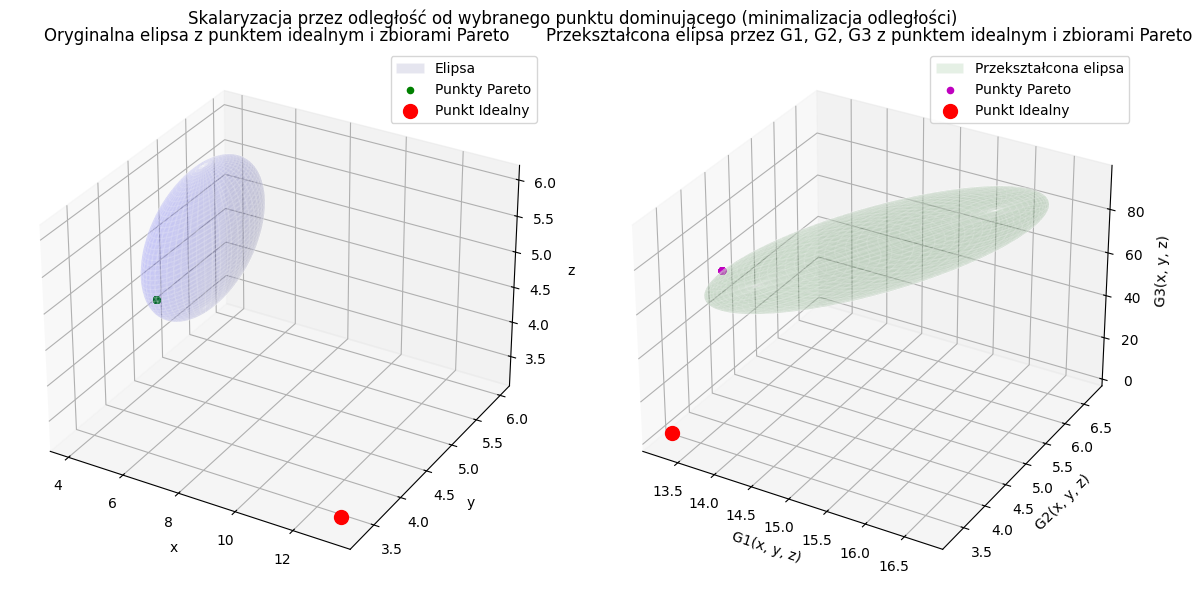

In [18]:
# Definicje funkcji celu
def G1(x, y, z):
    return x + y + z

def G2(x, y, z):
    return x - y + z

def G3(x, y, z):
    return x**2 + y**2 + z**2  # Nieliniowa funkcja celu

# Punkt początkowy
x0 = [5, 5, 5]

# Ograniczenia (np. kula o środku w (5,5,5) i promieniu 1 w przestrzeni trójwymiarowej)
def constraint_sphere(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2 + (x[2] - 5)**2)

# Lista ograniczeń
constraints = [{'type': 'ineq', 'fun': constraint_sphere}]

# Granice zmiennych
bounds = [(4, 6), (4, 6), (4, 6)]  # Granice dolne i górne dla x, y i z

# Znalezienie punktu idealnego
result_G1 = minimize(lambda x: G1(x[0], x[1], x[2]), x0, method='SLSQP', bounds=bounds, constraints=constraints)
ideal_G1 = G1(result_G1.x[0], result_G1.x[1], result_G1.x[2]) if result_G1.success else None

result_G2 = minimize(lambda x: G2(x[0], x[1], x[2]), x0, method='SLSQP', bounds=bounds, constraints=constraints)
ideal_G2 = G2(result_G2.x[0], result_G2.x[1], result_G2.x[2]) if result_G2.success else None

result_G3 = minimize(lambda x: G2(x[0], x[1], x[2]), x0, method='SLSQP', bounds=bounds, constraints=constraints)
ideal_G3 = G2(result_G3.x[0], result_G3.x[1], result_G3.x[2]) if result_G3.success else None

# Punkt idealny w przestrzeni funkcji celu
ideal_point = np.array([ideal_G1, ideal_G2, ideal_G3])

# Funkcja celu minimalizująca odległość euklidesową od punktu idealnego
def objective_distance(x):
    G1_val = G1(x[0], x[1], x[2])
    G2_val = G2(x[0], x[1], x[2])
    G3_val = G3(x[0], x[1], x[2])
    return np.sqrt((G1_val - ideal_point[0])**2 + (G2_val - ideal_point[1])**2 + (G3_val - ideal_point[2])**2)

# Generowanie zbioru Pareto
pareto_points = []
for epsilon in np.linspace(0, 1, 50):
    result = minimize(objective_distance, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt, z_opt = result.x
        pareto_points.append([G1(x_opt, y_opt, z_opt), G2(x_opt, y_opt, z_opt), G3(x_opt, y_opt, z_opt), x_opt, y_opt, z_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elipsy w przestrzeni oryginalnej (ok. kula)
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
x = 5 + np.outer(np.cos(theta), np.sin(phi))  # współrzędne x kuli
y = 5 + np.outer(np.sin(theta), np.sin(phi))  # współrzędne y kuli
z = 5 + np.outer(np.ones_like(theta), np.cos(phi))  # współrzędne z kuli

# Przekształcona elipsa przez funkcje G1, G2, i G3
transformed_x = G1(x, y, z)  # Zastosowanie G1 na elipsie
transformed_y = G2(x, y, z)  # Zastosowanie G2 na elipsie
transformed_z = G3(x, y, z)  # Zastosowanie G3 na elipsie

# Wykresy
fig = plt.figure(figsize=(12, 6))

# Wykres oryginalnej elipsy i zbioru Pareto
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, color='b', alpha=0.1, edgecolor='w', label="Elipsa")
ax1.scatter(pareto_points[:, 3], pareto_points[:, 4], pareto_points[:, 5], c='g', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
ax1.scatter(ideal_point[0], ideal_point[1], ideal_point[2], c='r', s=100, label="Punkt Idealny")
ax1.set_title("Oryginalna elipsa z punktem idealnym i zbiorami Pareto")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.legend()

# Wykres przekształconej elipsy i zbioru Pareto
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(transformed_x, transformed_y, transformed_z, color='g', alpha=0.1, edgecolor='w', label="Przekształcona elipsa")
ax2.scatter(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], c='m', label="Punkty Pareto")  # Punkty Pareto na przekształconej elipsie
ax2.scatter(ideal_point[0], ideal_point[1], ideal_point[2], c='r', s=100, label="Punkt Idealny")
ax2.set_title("Przekształcona elipsa przez G1, G2, G3 z punktem idealnym i zbiorami Pareto")
ax2.set_xlabel("G1(x, y, z)")
ax2.set_ylabel("G2(x, y, z)")
ax2.set_zlabel("G3(x, y, z)")
ax2.legend()

plt.suptitle(r"Skalaryzacja przez odległość od wybranego punktu dominującego (minimalizacja odległości)")
plt.tight_layout()
plt.show()


# Wnioski
W ramach ćwiczenia zaimplementowano oraz sprawdzono działanie trzech metod skalaryzacji dla
problemów optymalizacji wielokryterialnej. Znaczący wpływ na działanie tych metod ma dobranie odpowiednich parametrów: 
- wartości wag dla metody skalaryzacji przez funkcję liniową, 
- wartości i ilość ograniczeń $\epsilon$ dla drugiej metody,
- rodzaj metryki dla metody skalaryzacji przez odległość od punktu idealnego. 